<a href="https://colab.research.google.com/github/Smettus/175/blob/main/Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install unidecode
!pip install pandas
!pip install scikit-learn
!pip install nltk
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.5/156.5 kB 5.3 MB/s eta 0:00:00


In [2]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import numpy as np
from unidecode import unidecode
from nltk.corpus import stopwords
import re

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Text embeddings

For more delaills:
- https://www.youtube.com/watch?v=gQddtTdmG_8&list=PLpZDOCgNofesTWhuemxsB_5ORU_mJfOwd&index=1
- https://www.youtube.com/watch?v=hQwFeIupNP0&list=PLpZDOCgNofesTWhuemxsB_5ORU_mJfOwd&index=2

If we want to work to  analyze text collections with computers, we must first transform the text into numbers, or more precisely, a vector of numbers which is the format computers can process. This is where text embeddings come into play. A text embedding is essentially a text representation in a high-dimensional latent space.


![embeddings](https://drive.google.com/uc?id=161ey1DSExMjDEYyu9tg-iAFT-Rlpz71A)

But, how can we do that? First, we need to understand the two main text embedding types: text embedding with and without semantic information.


1. **Text embedding without semantic information**

  If this case, the embedding vectors corresponds in general with statistical properties related with the number of times a word appears in a particular corpus. The most used one is the bag of words (BoW) method. The Bag of Words (BoW) method is a simple and widely used technique for generating text embeddings. It involves representing text data as a 'bag' (multiset) of its words, disregarding grammar and word order but keeping multiplicity.
  
  ![Encoding](https://miro.medium.com/v2/resize:fit:720/format:webp/1*YEJf9BQQh0ma1ECs6x_7yQ.png)
  
  The main steps in the Bag of Words method are as follows:

    - **Vocabulary Creation**: First, a vocabulary is constructed by listing all unique words that appear in the text corpus. This vocabulary forms the feature set.
    - **Document Representation**: Each document (or piece of text) in the corpus is then represented as a vector. The length of this vector is equal to the size of the vocabulary.

    ![bow](https://miro.medium.com/v2/resize:fit:661/0*cf1wq8eIix-Z2qIf.png)

    - **Vectorization**: For each document, the corresponding vector is filled with the frequency of each vocabulary word that appears in the document. This can be done in several ways:

      - **Binary**: Each element in the vector is 1 if the word from the vocabulary is present in the document and 0 otherwise.

      ![binary](https://www.researchgate.net/publication/268050206/figure/fig4/AS:669532460970014@1536640386963/Example-of-the-bag-of-word-text-representation-with-the-occurrence-of-word-as-feature.ppm)

      - **Count**: Each element is the count of the number of times the word appears in the document.
      - **Term Frequency (TF)**: Each element is the frequency of the word in the document (word count divided by total number of words in the document).
      - **TF-IDF** (Term Frequency-Inverse Document Frequency): This is a more advanced variation where each word's frequency (TF) is weighted by its inverse document frequency (IDF).
          - TF measures how frequently a term occurs in a document and it is calculated by dividing the number of times the term appears in the document by the total number of terms in the document.
          - IDF measures how important a term is across the entire corpus. It is calculated by dividing the total number of documents by the number of documents containing the term, and then taking the logarithm of that quotient. This diminishes the weight of terms that occur very frequently in the dataset and increases the weight of terms that occur rarely.

<center> $w_{ij}=tf_{ij}\cdot\log\left(\frac{N}{d_{ij}}\right)$ </center>

Here, $w_{ij}$ is the weight of the word $i$ (component of the vector in position $i$) of the sentence $j$. $t_{ij}$ is the number of occurences of word $i$ in sentence $j$, $d_{ij}$ is the number of documents containing the word $i$ and $N$ is the total number of documents.

Consider for example that we have a set of two documents:

- Doc A: **The car is driven on the road**
- Doc B: **The truck is driven on the highway**

![tfidf](https://mylearningsinaiml.files.wordpress.com/2018/10/nlp1.png?w=636&h=319)

  - **Vector Normalization** (Optional): Sometimes, the vectors are normalized to have a unit length to reduce the impact of document length on the vector representation.

2. **Text embedding with semantic meaning**

  In this case, the key principle is that vectors representing similar words (e.g., "dog" and "cat") should be closer in this space than those representing unrelated words (e.g., "dog" and "pineapple"). Thus, exploring the latent space around a word's embedding reveals semantically similar words. Moreover, these embeddings allow us to perform mathematical operations that reflect the semantic relationships of the underlying text. Classic examples include:

  - king - man + woman = queen
  - paris - france + spain = madrid

  If we are able to perform such kind of operations, it means that the vector representing our words contains some semantic meaning. So, let's try to respond the question of how we can construct these embeddings.

  2.1 **Neural networks**

    This procedure consist in the training of a neural network on a task with known answers. The process involves:

    1. Encoding text with an initial vector representation without semantic meaning.
    2. Feeding this text through a neural network, initially with random coefficient values.
    3. Comparing the network's output with the known 'correct' response, calculating the difference as a loss to be minimized.
    4. Utilizing backpropagation with this loss to adjust the neural network's coefficients.
    5. Repeating from step 1 with different texts.

    Repeated iterations over a substantial corpus, until the loss stabilizes, yield a neural network characterized by a set of optimized coefficients. These coefficients encapsulate semantic information about the trained words, achieving our goal of generating meaningful text embeddings.

    ![Simple neural network architecture to obtain word embeddings](https://drive.google.com/uc?export=view&id=1-5dzDlN5o9COLuKqSTx1WcWbUuUXpYga)

    The network's hidden layer structure and the number of coefficients determine the embedding type and the dimensionality of the embedding space, respectively. Some examples of neural networks architectures are:

    1) **Word2Vec**

    The architecture of the Word2Vec neural network is relatively simple and efficient, consisting of an input layer, a hidden layer and a output layer. Word2Vec comes in two main variants: **Continuous Bag of Words (CBOW)** and **Skip-Gram**. Here's a breakdown of both:

    - **Continuous Bag of Words (CBOW)**:

        - **Input Layer**: The input to the CBOW model is the context words. For a given target word, the context is defined as a fixed-size window of words surrounding the target word. The input words are one-hot encoded.
        - **Hidden Layer**: The one-hot encoded input words are projected to the hidden layer. This layer has a fixed size, which determines the dimensionality of the word embeddings. The projection is achieved through a weight matrix (the embedding matrix).
        - **Output Layer**: The hidden layer is then projected to the output layer. The output layer has the same size as the vocabulary, and it uses a softmax function to predict the probability of the target word given the context.

      The hyperparameters in this case are:
      
      - **size** parameter defines the size of the word vectors.
      - **window** defines the maximum distance between the current word and the predicted words (context words) within a sentence. If the window is set to n, then n words before and n words after the current word will be taken into account as context words.
      
      For example, with a window size of 2, the model looks at two words before and two words after the current word. A larger window size means more context words and potentially captures more semantic information. However, it might also include less relevant words in the context.

      ![Word2vec cbow](https://drive.google.com/uc?export=view&id=1-D6QLugSPxG8ltgCCYvKmAYWY_OIAsDw)

    - **Skip-Gram**:
        - **Input Layer**: In the Skip-Gram model, the input is the target word, represented as a one-hot encoded vector.
        - **Hidden Layer**: Similar to CBOW, the input is projected to a hidden layer using a weight matrix. The size of the hidden layer determines the dimensionality of the word embeddings.
        - **Output Layer**: The Skip-Gram model differs from CBOW in its output. Instead of predicting a single target word, it predicts the context words within a certain window around the input word. The output layer, therefore, predicts multiple words (each corresponding to a position in the context window) and is typically implemented using a softmax function.

      ![skipgram](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*kmGkGHLlH5_PcaiG.png)

    Word2Vec requires a large amount of data to train effectively and does not inherently handle out-of-vocabulary words. It also treats each word as a single entity and does not account for word order in a sentence.

    2) **Transformers**

    ![transformerts](https://miro.medium.com/v2/resize:fit:1234/1*43lgCTyM5cTTABjC2VEHdA.png)

    Embeddings generated using transformer models represent a significant advancement in the field of Natural Language Processing (NLP). Transformers, introduced in the paper ["Attention Is All You Need"](https://arxiv.org/abs/1706.03762) by Vaswani et al., have become the foundation for many state-of-the-art NLP models.

    Transformer models utilize a mechanism called 'self-attention' to weigh the importance of different words in a sentence, capturing the context more effectively. Unlike previous models that processed words in sequence (like RNNs and LSTMs), transformers can process all words in a sentence simultaneously, leading to significant improvements in efficiency and effectiveness.

    In transformer-based models, embeddings are dynamic, meaning that the representation of a word changes based on the sentence context. This is a significant difference from models like Word2Vec and GloVe, where each word has a fixed representation.

    Based on the architecture, transformers can be divided in three categories:

    - **Encoder-only models**: These models are adept at understanding or processing input text. They're used for tasks like text classification, named entity recognition, and semantic similarity.One prominent example is [BERT](https://www.youtube.com/watch?v=t45S_MwAcOw) (Bidirectional Encoder Representations from Transformers).

      - **all-MiniLM-L6-v2**: is a vaeriant of BERT Developed by Microsoft, the MiniLM model is part of the effort to create smaller, more efficient transformer models without significantly compromising performance.  Despite its smaller size, MiniLM achieves remarkable performance close to its larger counterparts. This is achieved through knowledge distillation, a process where a smaller model is trained to replicate the performance of a larger, more complex model.

      - **RoBERTa** (A Robustly Optimized BERT Pretraining Approach): Developed by Facebook AI, RoBERTa is a variation of BERT that was trained on a larger dataset and with more robust optimization techniques. RoBERTa outperforms BERT on several benchmark NLP tasks.
    
    - **Decoder-only models**: Decoder models are designed to generate text. They process the input text sequentially, making them well-suited for tasks like text generation where the context from the previously generated text is used to predict the next word. [GPT]{https://arxiv.org/abs/2305.10435} (Generative Pre-trained Transformer) is a prime example of a decoder-only model.

    - **Encoder-decoder models**: These models leverage both encoders and decoders, making them versatile for tasks that involve both understanding the input text and generating text based on that understanding. [BART]{https://arxiv.org/abs/1910.13461} (Bidirectional and Auto-Regressive Transformers) and [T5](https://arxiv.org/abs/1910.10683) (Text-to-Text Transfer Transformer) are some examples.

    Many different models can be found and downloaded from https://huggingface.co/models?pipeline_tag=sentence-similarity&sort=downloads

  2.2 **Other machine learning methods**

    An example of a different approach to obtain words embeddings is GloVe. It is an unsupervised learning algorithm developed by Stanford for generating word embeddings by aggregating global word-to-word co-occurrence matrix from a corpus. In other words, if two words co-occur many times, it means they have some linguistic or semantic similarity. It is an extension to the word2vec method.

    GloVe stands for global vectors for word representation. Given a corpus having $VxV$ words, the co-occurrence matrix X will be a V×V matrix, where the i-th row and j-th column of X, Xij denotes how many times word i has co-occurred with word j. More details can be found [here](https://wandb.ai/authors/embeddings-2/reports/An-Introduction-to-the-Global-Vectors-GloVe-Algorithm--VmlldzozNDg2NTQ).

    An example is the co-occurrence matrix for the sentence “the cat sat on the mat” with a window size of 1 given as follows.

    ![Example of co-ocurrence matrix](https://drive.google.com/uc?export=view&id=1-N7q9LmXbki3LnG0TDQmxLObrbJzLIZA)


The training process in GloVe, although not iterative in the same sense as neural network models, still involves an optimization procedure. The key difference lies in what the model is optimizing. In GloVe, the training consists of minimizing a cost function that encapsulates the difference between the product of word vector representations and the logarithm of their co-occurrence probabilities. The dimensions of the final GloVe vectors depend on a parameter chosen before training the GloVe model.

# Practical example

The 20 Newsgroups dataset is a popular collection of approximately 20,000 newsgroup documents, partitioned nearly evenly across 20 different newsgroups. It has become a standard dataset for experiments in text applications of machine learning techniques, such as text classification and text clustering.

In [3]:
# Get the dataset
newsgroups_train = fetch_20newsgroups(subset='train')
# Assign a number to each topic
id2Topic = {i:x for i,x in enumerate(newsgroups_train.target_names)}
# Create a dataframe with the text and the topic
df = pd.DataFrame({'text':newsgroups_train.data, 'topic':newsgroups_train.target})
df['topic_label'] = df['topic'].apply(lambda x: id2Topic[x])
df

,text,topic,topic_label
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [4]:
# Let's explore a document of the dataset
i=10
print(df.text.values[i])
print('Topic: ',df.topic_label.values[i])

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

,topic_label,count
10,rec.sport.hockey,600
15,soc.religion.christian,599
8,rec.motorcycles,598
9,rec.sport.baseball,597
11,sci.crypt,595


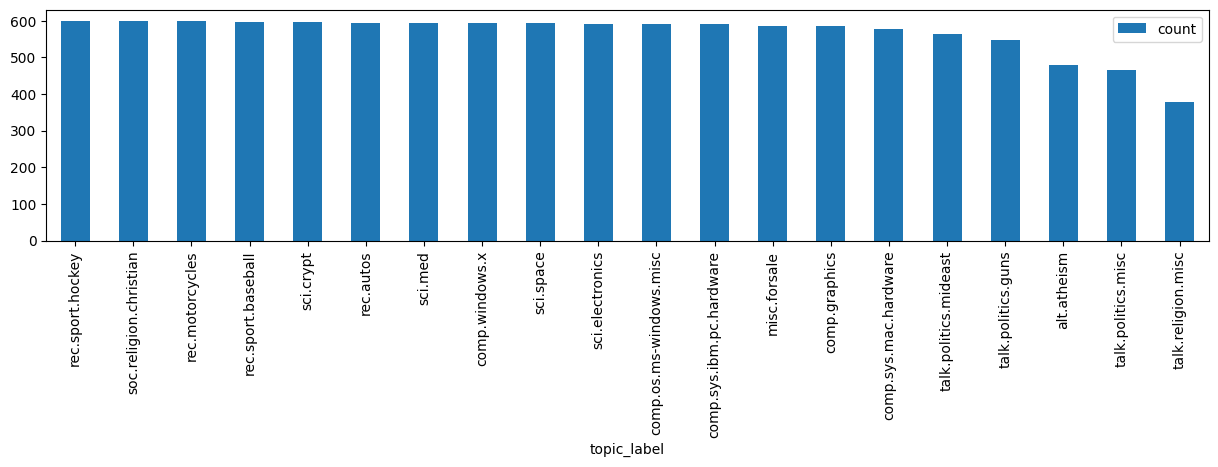

In [5]:
# Let's explore the distribution of the topics
dfDistribution = df[['topic_label','text']].groupby('topic_label').count().reset_index().rename(columns={'text':'count'}).sort_values('count',ascending=False)
dfDistribution.plot.bar(x='topic_label',y='count',figsize=(15,3))
dfDistribution.head()

1. **Text preprocessing**

Preprocessing text before using it in Natural Language Processing (NLP) tasks is crucial for several reasons, fundamentally improving the performance and effectiveness of NLP models. Here are some key points that highlight the importance of text preprocessing:

- **Noise Reduction**: Text data often comes with a lot of noise, including irrelevant characters, symbols, and formatting (e.g., HTML tags in web scraped data). Preprocessing helps remove these unnecessary elements, ensuring that the models focus on the meaningful content.

- **Normalization**: It involves converting the text into a more uniform format. This can include tasks like lowercasing, stemming (reducing words to their root form), and lemmatization (reducing words to their base or dictionary form).

- **Removing Stop Words**: Stop words are common words like "is," "and," "the," etc., that often don't contribute much to the meaning of a sentence, especially in the context of tasks like topic modeling or sentiment analysis. Removing these can help focus on more meaningful words. This is esentical for simple models are Word2Vec or GloVe but <u>we should leave the stopwords when we work with transformers models</u>.




In [6]:
def removeHeaderFooter(tx):
    """Remove the header and the footer of the text
      header: by splitting the input string using '\n\n' and removing the first element
      footer: by splitting the string using '--' and taking the first element
        Args:
            text (str): Text to remove the header
        Returns:
            str:Text without header
    """
    if '\n\n' in tx:
      tx = tx.split('\n\n',1)[1]
    # Remove the quote
    if '--' in tx:
      tx = tx.split('--',1)[0]
    return tx

def formatComment(tx):
    """Remove the format of the comments
      - Remove empty lines
      - Remove lines starting with 'in article'
      - Remove > symbols.
        Args:
            text (str): Text to format the comment
        Returns:
            str:Text formatted
    """
    if '\n' not in tx:
      return tx
    tx2 = []
    for x in tx.split('\n'):
      # Split input text in lines
        if len(x)>0 and 'in article' not in x:
          # Consider the string if it is not empty and does not start with 'in article'
            tx2.append(x)
    # Remove all > characters
    tx2 = ' '.join(tx2).replace('>','')
    return tx2

def remove_words_with_numbers(text):
    """Remove words containing numbers
        Args:
            text (str): Text to clean
        Returns:
            str: Cleaned text
    """
    # Regex pattern to match words containing numbers
    pattern = r'\b\w*\d\w*\b'

    # Replace words containing numbers with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text

def remove_email_addresses(text):
    """Remove email addresses
        Args:
            text (str): Text to clean
        Returns:
            str: Cleaned text
    """
    # Regex pattern to match email addresses
    pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

    # Replace email addresses with an empty string
    cleaned_text = re.sub(pattern, '', text)

    return cleaned_text


def preprocess_text(text):
    """Preprocess text
        Args:
            text (str): Text to preprocess
            num_min_letters (int): Minimum number of letters per word
        Returns:
            str: Preprocessed text
    """
    # Remove header and footer
    text = removeHeaderFooter(text)
    # Conver to lowercase
    text = text.lower()
    # format comments
    text = formatComment(text)
    # # Remove accents
    text = unidecode(text)
    # Remove new line characters
    text = text.replace('\n',' ')
    text = text.replace('\t',' ')
    # Remove email addresses
    text = remove_email_addresses(text)
    # Remove words containing numbers
    text = remove_words_with_numbers(text)
    # Remove non-alphanumeric characters
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.replace('   ',' ').replace('  ',' ').strip()

# List with common english stop words
stop_words = stopwords.words('english')

print('Stopwords:',stop_words[:100])

def removeStopWords(text):
    """ Remove the stop words from a string
        Args:
            text (str): Text to process
        Returns:
            str: text without stopwords
    """
    text = [word for word in text.split(' ') if word not in stop_words]
    text = ' '.join(text)
    return text

Stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [7]:
# Example of text pre-process

i=10
print(df.text.values[i])
print('-- After preprocessing --')
print(preprocess_text(df.text.values[i]))
print('')
print('-- After preprocessing + stopwords removal--')
print(removeStopWords(preprocess_text(df.text.values[i])))

From: irwin@cmptrc.lonestar.org (Irwin Arnstein)
Subject: Re: Recommendation on Duc
Summary: What's it worth?
Distribution: usa
Expires: Sat, 1 May 1993 05:00:00 GMT
Organization: CompuTrac Inc., Richardson TX
Keywords: Ducati, GTS, How much? 
Lines: 13

I have a line on a Ducati 900GTS 1978 model with 17k on the clock.  Runs
very well, paint is the bronze/brown/orange faded out, leaks a bit of oil
and pops out of 1st with hard accel.  The shop will fix trans and oil 
leak.  They sold the bike to the 1 and only owner.  They want $3495, and
I am thinking more like $3K.  Any opinions out there?  Please email me.
Thanks.  It would be a nice stable mate to the Beemer.  Then I'll get
a jap bike and call myself Axis Motors!

-- 
-----------------------------------------------------------------------
"Tuba" (Irwin)      "I honk therefore I am"     CompuTrac-Richardson,Tx
irwin@cmptrc.lonestar.org    DoD #0826          (R75/6)
-------------------------------------------------------------------

In [ ]:
# Add a column to the dataframe with the pre-processed text and text without stopwords
df['text_clean'] = df['text'].apply(preprocess_text)
df['text_clean_stopwords'] = df['text_clean'].apply(removeStopWords)
df

,text,topic,topic_label,text_clean,text_clean_stopwords
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,i was wondering if anyone out there could enli...,wondering anyone could enlighten car saw day d...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,a fair number of brave souls who upgraded thei...,fair number brave souls upgraded si clock osci...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,well folks my mac plus finally gave up the gho...,well folks mac plus finally gave ghost weekend...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,robert jc kyanko wrote anyone know about the w...,robert jc kyanko wrote anyone know weitek grap...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,from article by tom a baker clear caution warn...,article tom baker clear caution warning memory...
...,...,...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med,dn from david nye dn a neurology dn consultati...,dn david nye dn neurology dn consultation chea...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware,i have a very old mac and a mac plus both of w...,old mac mac plus problem screens blank sometim...
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware,i just installed a cpu in a clone motherboard ...,installed cpu clone motherboard tried mounting...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics,boy this will be embarassing if it is trivial ...,boy embarassing trivial faq given points non c...


Once we have the preprocessed text, we are going to test different word embedding models. To evaluate these models, we will train a model to classify the text in the different categories. As a simple exercise, we can use three machine learning approaches:

- [Logistic regression](https://www.analyticsvidhya.com/blog/2021/08/conceptual-understanding-of-logistic-regression-for-data-science-beginners/)
- [Random forest](https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/)
- [Simple neural network](https://www.analyticsvidhya.com/blog/2023/02/introduction-to-neural-network-build-your-own-network/)

In [8]:
# Logistic regression

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def fitLogisticRegression(X, y):
    """ Fit a logistic regression
        Args:
            X (np.array[np.array()]): Array containing the different embedding vectors
            y (np.array()): Array with the ids of the categories
        Returns:
            sklearn.linear_model, float: trained logistic model, accuracy
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create logistic regression model
    model = LogisticRegression(max_iter=1000)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Print logistic accuracy: {accuracy}')
    return model, accuracy

In [9]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

def fitRandomForest(X,y, n_estimators=100):
    """ Fit a random forest
        Args:
            X (np.array[np.array()]): Array containing the different embedding vectors
            y (np.array()): Array with the ids of the categories
        Returns:
            sklearn.ensemble, float: trained random forest classifier, accuracy
    """
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create Random Forest classifier model
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    print(f'Random forrest accuracy: {accuracy}')

    return model, accuracy

In [10]:
# Simple neural network

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

def simpleNN(X, y, neurons=128,epochs=5):
    """ Fit a simple neural network with oine hidden layer
        Args:
            X (np.array[np.array()]): Array containing the different embedding vectors
            y (np.array()): Array with the ids of the categories
        Returns:
            tensorflow.keras.model, float: trained model, accuracy
    """
    # Create the model
    model = Sequential([
        Dense(neurons, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
        Dense(20, activation='softmax')  # Output layer with 10 neurons (one for each class) and softmax activation
    ])

    # Compile the model
    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

    # Split the dataset into training and testing sets
    y_one_hot = to_categorical(y, num_classes=20)
    X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)


    # Train the model
    model.fit(X_train, y_train, epochs=epochs, batch_size=32)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f'Test accuracy: {test_acc}')

    return model, test_acc

2. **Testing *BoW***

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

def extract_bag_of_words(docs, max_df=1.0, min_df=1):
    """ Fit a simple neural network with oine hidden layer
        Args:
            docs (list[str]): Array containing the different document strings
            max_df (float): Maximum percentage occurence for removing terms that appear too frequently,
            min_df (float): Minimum percentage occurence for removing terms that appear too infrequently.
        Returns:
            pandas.DataFrame, sklearn.feature_extraction.text: DataFrame with the embeddings, vectorizer
    """
    # Create a CountVectorizer object
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df )

    # Fit the vectorizer to the docs and transform the text to a bag of words
    embeddings = vectorizer.fit_transform(docs)

    # Get the feature names (words)
    feature_names = vectorizer.get_feature_names_out()

    return embeddings,feature_names, vectorizer

# Exclude the words that appear in more than 90% of the documents or in less than 5% of the documents
embeddings, feature_names, vectorizer = extract_bag_of_words(df['text_clean'].values, max_df=0.9, min_df=0.05)

X = embeddings.toarray()
y = df.topic.values

print('Features',feature_names[:10:])
print('Vector dimensions: ',embeddings.shape)


KeyError: 'text_clean'

In [ ]:
model_logistic, accuracy_logistic = fitLogisticRegression(X, y)

Print logistic accuracy: 0.33961708394698087


In [ ]:
# Example of prediction
text = "Try using the in-built dictation tool in your Windows computer to convert your spoken words into text on your Windows 10 Laptop / Desktop. Dictation uses speech recognition, which is built into Windows 10, so there's nothing you need to download or install to use it. It does require internet access though."

# We need to process the document as the documents used for training
text_clean = preprocess_text(text)

# Vectorize the text
text_vectorize = vectorizer.transform([text_clean])

# Extract the prediction
prediction_index = model_logistic.predict(text_vectorize)[0]

# Convert to the label
prediction_label = id2Topic[prediction_index]

print('Predicted label',prediction_label)


Predicted label comp.os.ms-windows.misc


In [ ]:
model_forest, accuracy_forest = fitRandomForest(X,y, n_estimators=100)

Random forrest accuracy: 0.41384388807069217


In [ ]:
# Example of prediction
text = "Try using the in-built dictation tool in your Windows computer to convert your spoken words into text on your Windows 10 Laptop / Desktop. Dictation uses speech recognition, which is built into Windows 10, so there's nothing you need to download or install to use it. It does require internet access though."

# We need to process the document as the documents used for training
text_clean = preprocess_text(text)

# Vectorize the text
text_vectorize = vectorizer.transform([text_clean])

# Extract the prediction
prediction_index = model_forest.predict(text_vectorize)[0]

# Convert to the label
prediction_label = id2Topic[prediction_index]

print('Predicted label',prediction_label)

Predicted label comp.os.ms-windows.misc


In [ ]:
model_nn, accuracy_nn = simpleNN(X, y, neurons=128,epochs=10)

Epoch 1/10
248/248 [==============================] - 3s 3ms/step - loss: 2.7912 - accuracy: 0.1681
Epoch 2/10
248/248 [==============================] - 1s 3ms/step - loss: 2.2549 - accuracy: 0.3194
Epoch 3/10
248/248 [==============================] - 1s 3ms/step - loss: 1.9956 - accuracy: 0.4084
Epoch 4/10
248/248 [==============================] - 1s 3ms/step - loss: 1.8295 - accuracy: 0.4578
Epoch 5/10
248/248 [==============================] - 1s 3ms/step - loss: 1.7094 - accuracy: 0.4972
Epoch 6/10
248/248 [==============================] - 1s 4ms/step - loss: 1.5987 - accuracy: 0.5236
Epoch 7/10
248/248 [==============================] - 1s 4ms/step - loss: 1.5080 - accuracy: 0.5497
Epoch 8/10
248/248 [==============================] - 1s 4ms/step - loss: 1.4332 - accuracy: 0.5785
Epoch 9/10
248/248 [==============================] - 1s 5ms/step - loss: 1.3431 - accuracy: 0.6047
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 2.1876 - accuracy: 0.3856

In [ ]:
# Example of prediction
text = "Try using the in-built dictation tool in your Windows computer to convert your spoken words into text on your Windows 10 Laptop / Desktop. Dictation uses speech recognition, which is built into Windows 10, so there's nothing you need to download or install to use it. It does require internet access though."

# We need to process the document as the documents used for training
text_clean = preprocess_text(text)

# Vectorize the text
text_vectorize = vectorizer.transform([text_clean])

# Extract the prediction. In this case, the model return the probabilies for the document to be in each category
prediction = model_nn.predict(text_vectorize)[0]
print('Probabilities',prediction)
print('Sum of probabilities:',sum(prediction))

# Extract the index of the maximum probability
prediction_index = np.argmax(prediction)
print('Index',prediction_index)

# Convert to the label
prediction_label = id2Topic[prediction_index]

print('Predicted label',prediction_label)

1/1 [==============================] - 0s 490ms/step
Probabilities [1.1583877e-06 7.1786344e-03 9.8611206e-01 1.9276218e-03 2.6366895e-05
 4.3775318e-03 2.4437177e-04 6.1076489e-06 8.9904970e-06 3.0598997e-07
 1.3370179e-06 3.2391032e-05 7.5329517e-05 1.8069833e-06 1.9263912e-06
 1.1029005e-06 6.0129787e-07 9.9157296e-07 2.3785272e-07 9.8761109e-07]
Sum of probabilities: 0.9999998595287565
Index 2
Predicted label comp.os.ms-windows.misc


2. **Testing Word2Vec**

  2.1 From fitted model

In [ ]:
from gensim.models import Word2Vec

def get_Word2Vec_embedding(doc, model):
    """ Get the embedding of a sentence as the average of the word embeddings

        Args:
            sentence (list): List of words
            model (gensim.models.word2vec.Word2Vec): Word2Vec model
        Returns:
            numpy.array: Embedding of the sentence
    """
    # Split the sentence into words
    words = doc.split(' ')

    # Get the word vectors for the words in the sentence
    vectors = [model.wv[word] for word in words if word in model.wv]

    # Return the average vector for the sentence
    return np.mean(vectors, axis=0)

def extract_Word2Vec(docs, size,window=5, min_count=1, epochs = 5):
    """ Extract the Word2Vec representation of the documents

        Args:
            docs (list): List of documents
            size (int): Dimension of the word embeddings
            window (int): Window size
            min_count (int): Minimum number of times a word must appear in the corpus
            epochs (int): Number of iterations over the corpus.
        Returns:
            numpy.array: Word2Vec representation of the documents
            gensim.models.word2vec.Word2Vec: Word2Vec model used to extract the Word2Vec representation
    """
    # Convert each sentence to an array of words
    sentences = [doc.split(' ') for doc in docs]

    # Apply the word2vec approach to the input data
    model = Word2Vec(sentences, vector_size=size, window=window, min_count=min_count, workers=4, epochs = epochs)

    # Extract the embedding vectors for the documents
    embeddings_word2vec = np.array([get_Word2Vec_embedding(doc, model) for doc in docs])

    return embeddings_word2vec, model

def getSimilarWords(word, model):
    """ Get the most similar words to a given word

        Args:
            word (str): Word
            model (gensim.models.word2vec.Word2Vec): Word2Vec model
        Returns:
            list: List of tuples with the most similar words and their similarity score
    """
    if word in  model:
        # Get the most similar words to the word
        words_similar = model.most_similar(word)
        print('Most similar words to ',word,': ',words_similar)
        return words_similar
    else:
        print(f'Word {word} not in vocabulary')
        return []

def getWordOperation(word1, word2, word3, model):
    """ Get the closest words to the result of a word operation word1 - word2 + word3

        Args:
            word1 (str): First word
            word2 (str): Second word
            word3 (str): Third word
            model (gensim.models.word2vec.Word2Vec): Word2Vec model
        Returns:
            list: List of tuples with the closest words and their similarity score
    """

    if word1 in model and word2 in model and word3 in model:
        # compute the result vector
        vector = model[word1] - model[word2] + model[word3]

        # Find the closest words to the result vector
        close_words = model.most_similar(positive=[vector], topn=10)

        print(close_words)
        return close_words
    else:
        print('One of the words is not in the vocabulary')
        if word1 not in model:
            print('w1',word1)
        if word2 not in model:
            print('w2',word2)
        if word3 not in model:
            print('w3',word3)
        return []


In [ ]:
# Get the embeddings
X, model_word2vec = extract_Word2Vec(df.text_clean_stopwords.values, size = 200, window=5, min_count=1, epochs = 50)

# The topics
y = df.topic.values

In [ ]:
# Check the fitted vocabulary
vocab = model_word2vec.wv.index_to_key
print('Vocabulary size: ',len(vocab))
print('Examples: ',vocab[:10])

Vocabulary size:  61822
Examples:  ['', 'would', 'one', 'like', 'dont', 'people', 'know', 'get', 'think', 'writes']


Most similar words to  windows :  [('microsoft', 0.44595903158187866), ('utilities', 0.44037067890167236), ('dos', 0.44028061628341675), ('desktop', 0.43238216638565063), ('modes', 0.4244692325592041), ('fonts', 0.42435964941978455), ('os', 0.42090150713920593), ('excel', 0.4055192768573761), ('file', 0.40252721309661865), ('norton', 0.40142571926116943)]


<Axes: xlabel='word'>

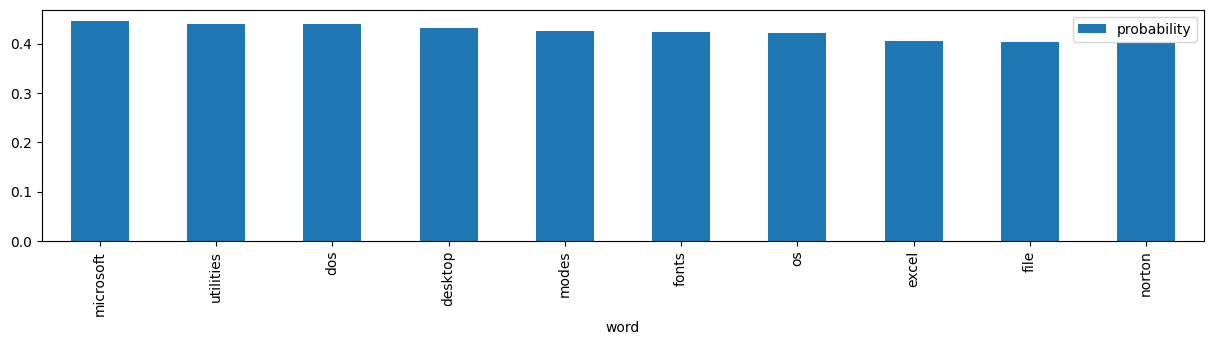

In [ ]:
# Because Word2Vect extract some semantic meaning,
# we can look for words that are "close" from a semantic point of view

word = 'windows'
word_similar = getSimilarWords(word, model_word2vec.wv)

# Plot the similar words
pd.DataFrame(word_similar,columns=['word','probability']).plot.bar(x='word',y='probability',figsize=(15,3))

In [ ]:
# Also, operations in the vector space can be translated into operation in semantics
word1 = 'paris'
word2 = 'france'
word3 = 'russia'

vocabulary = model_word2vec.wv

# Check that all words are in the vocabulary

if word1 in vocabulary and word2 in vocabulary and word3 in vocabulary:
  # compute the result vector
  vector = vocabulary[word1] - vocabulary[word2] + vocabulary[word3]

  # Find the closest words to the result vector
  close_words = vocabulary.most_similar(positive=[vector], topn=10)

  print(close_words)
else:
  print('At least one of the words are not in the vocabulary')


[('russia', 0.6897096037864685), ('moscow', 0.4706834554672241), ('paris', 0.4430350661277771), ('bratislava', 0.43802136182785034), ('kars', 0.4281139373779297), ('oversaw', 0.42050522565841675), ('aharonian', 0.4158799946308136), ('gromov', 0.4085389971733093), ('avetis', 0.4060995578765869), ('puschino', 0.4060856103897095)]


In [ ]:
# Logistic
model, accuracy =  fitLogisticRegression(X, y)

Print logistic accuracy: 0.46892488954344624


In [ ]:
# Random forrest
model, accuracy = fitRandomForest(X,y, n_estimators=100)

Random forrest accuracy: 0.47216494845360824


In [ ]:
# Simple neural network
model, accuracy = simpleNN(X, y, neurons=128,epochs=10)

Epoch 1/10
248/248 [==============================] - 2s 3ms/step - loss: 2.4389 - accuracy: 0.2369
Epoch 2/10
248/248 [==============================] - 2s 9ms/step - loss: 2.0326 - accuracy: 0.3399
Epoch 3/10
248/248 [==============================] - 3s 12ms/step - loss: 1.9295 - accuracy: 0.3719
Epoch 4/10
248/248 [==============================] - 1s 5ms/step - loss: 1.8864 - accuracy: 0.3805
Epoch 5/10
248/248 [==============================] - 1s 4ms/step - loss: 1.8582 - accuracy: 0.3930
Epoch 6/10
248/248 [==============================] - 1s 4ms/step - loss: 1.8336 - accuracy: 0.4024
Epoch 7/10
248/248 [==============================] - 1s 3ms/step - loss: 1.8128 - accuracy: 0.4070
Epoch 8/10
248/248 [==============================] - 1s 4ms/step - loss: 1.7963 - accuracy: 0.4143
Epoch 9/10
248/248 [==============================] - 1s 3ms/step - loss: 1.7815 - accuracy: 0.4171
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 1.7778 - accuracy: 0.427

  2.2 **From pretrained Word2Vec**

In [ ]:
# Available list of pretrained models using gensim
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')



In [ ]:
def sentence_embedding(sentence, model):
    """ Embed a sentence using a pretrained model

        Args:
            sentence (str): Sentence to embed
            model (gensim.model): Pretrained model used to embed
        Returns:
            list: Embedded vector
    """
    words = sentence.split()
    word_vectors = [model[word] for word in words if word in model]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    else:
        return np.mean(word_vectors, axis=0)

# Download one word2vect pretrained model
# model_word2vec_pretrain = gensim.downloader.load('word2vec-google-news-300')

# You can save the model in your google drive for future use
#drive.mount('/content/gdrive')
path = '/content/drive/MyDrive/word2vec/word2vec.model'
#model_word2vec_pretrain.save(path)

# You can use the model save in your google drive as
from gensim.models import KeyedVectors
model_word2vec_pretrain = KeyedVectors.load(path, mmap='r')


# Embedding using this model
X = np.array([sentence_embedding(doc, model_word2vec_pretrain) for doc in df.text_clean.values])

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
# Check the vocabulary for the pretrained model
vocab = model_word2vec_pretrain.index_to_key
print('Vocabulary size: ',len(vocab))
print('Examples: ',vocab[:10])

Vocabulary size:  400000
Examples:  ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]


In [ ]:
# Check word similarity
word = 'dog'
word_similar = getSimilarWords(word, model_word2vec_pretrain)

pd.DataFrame(word_similar,columns=['word','probability']).plot.bar(x='word',y='probability',figsize=(15,3))

Most similar words to  dog :  [('dogs', 0.8680489659309387), ('puppy', 0.8106428384780884), ('pit_bull', 0.780396044254303), ('pooch', 0.7627376914024353), ('cat', 0.7609457969665527), ('golden_retriever', 0.7500901818275452), ('German_shepherd', 0.7465174198150635), ('Rottweiler', 0.7437615394592285), ('beagle', 0.7418621778488159), ('pup', 0.740691065788269)]


In [ ]:
# Also, operations in the vector space can be translated into operation in semantics
word1 = 'mother'
word2 = 'woman'
word3 = 'man'

# If the model comes from the downloaded weights gensim.downloader.load('word2vec-google-news-300')
#vocabulary = model_word2vec_pretrain.wv
# If we use the saved model
vocabulary = model_word2vec_pretrain

# Check that all words are in the vocabulary

if word1 in vocabulary and word2 in vocabulary and word3 in vocabulary:
  # compute the result vector
  vector = vocabulary[word1] - vocabulary[word2] + vocabulary[word3]

  # Find the closest words to the result vector
  close_words = vocabulary.most_similar(positive=[vector], topn=10)

  print(close_words)
else:
  print('At least one of the words are not in the vocabulary')

[('father', 0.8103864789009094), ('son', 0.781380832195282), ('mother', 0.7647934556007385), ('uncle', 0.7491257190704346), ('dad', 0.7360326051712036), ('brother', 0.7332528829574585), ('stepfather', 0.7151471972465515), ('nephew', 0.7036622762680054), ('grandmother', 0.6921050548553467), ('younger_brother', 0.6917662024497986)]


In [ ]:
# Logistic
model, accuracy = fitLogisticRegression(X, y)

Print random forrest ccuracy: 0.7098674521354934


In [ ]:
# Random forrest
model, accuracy = fitRandomForest(X, y)

Random forrest accuracy: 0.6447717231222386


In [ ]:
# Simple neural network
model, accuracy = simpleNN(X, y)

Epoch 1/5
248/248 [==============================] - 1s 2ms/step - loss: 2.4634 - accuracy: 0.3157
Epoch 2/5
248/248 [==============================] - 1s 2ms/step - loss: 1.6899 - accuracy: 0.5371
Epoch 3/5
248/248 [==============================] - 1s 2ms/step - loss: 1.3882 - accuracy: 0.6015
Epoch 4/5
248/248 [==============================] - 1s 2ms/step - loss: 1.2301 - accuracy: 0.6401
Epoch 5/5
107/107 [==============================] - 0s 2ms/step - loss: 1.1586 - accuracy: 0.6636
Test accuracy: 0.6636229753494263


  2.3 **GloVe**

In [ ]:
# Download GloVe glove-wiki-gigaword-300 model
#glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

# Save to google drive
#path = '/content/drive/MyDrive/word2vec/glove.model'
#glove_vectors.save(path)

# Load from google drive
from gensim.models import KeyedVectors
glove_vectors = KeyedVectors.load(path, mmap='r')


# Embedding using this model
X = np.array([sentence_embedding(doc, glove_vectors) for doc in df.text_clean.values])
# The topics
y = df.topic.values

In [ ]:
# Check the vocabulary for the pretrained model
vocab = glove_vectors.index_to_key
print('Vocabulary size: ',len(vocab))
print('Examples: ',vocab[:10])

Vocabulary size:  400000
Examples:  ['the', ',', '.', 'of', 'to', 'and', 'in', 'a', '"', "'s"]


In [ ]:
# Check word similarity
word = 'dog'
word_similar = getSimilarWords(word, glove_vectors)

Most similar words to  dog :  [('dogs', 0.7888557314872742), ('cat', 0.6816746592521667), ('pet', 0.6291598081588745), ('puppy', 0.593606173992157), ('hound', 0.5468214750289917), ('horse', 0.5369751453399658), ('animal', 0.5316445827484131), ('cats', 0.5080744028091431), ('canine', 0.5038436055183411), ('pets', 0.5019966959953308)]


[('girl', 0.8516442775726318), ('boy', 0.7855764627456665), ('woman', 0.7282230854034424), ('mother', 0.6513352990150452), ('girls', 0.6477811932563782), ('child', 0.637647271156311), ('daughter', 0.6097123026847839), ('pregnant', 0.6020848751068115), ('teenage', 0.5985693335533142), ('grandmother', 0.5779023170471191)]


<Axes: xlabel='word'>

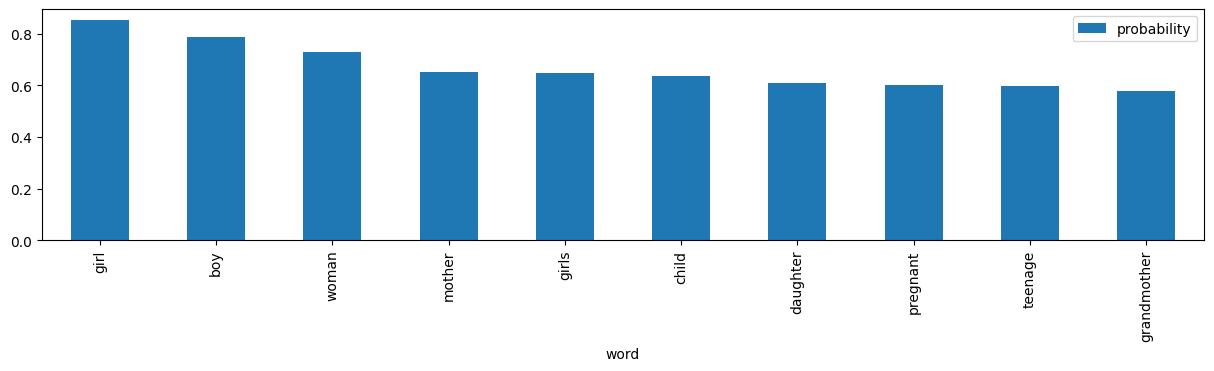

In [ ]:
# Check the operations with vector embeddings
word1 = 'boy'
word2 = 'man'
word3 = 'woman'
word_similar = getWordOperation(word1, word2, word3, glove_vectors)

pd.DataFrame(word_similar,columns=['word','probability']).plot.bar(x='word',y='probability',figsize=(15,3))

In [ ]:
# Logistic
model, accuracy = fitLogisticRegression(X, y)

Print logistic accuracy: 0.7104565537555229


In [ ]:
# Random forrest
model, accuracy = fitRandomForest(X, y)

Random forrest accuracy: 0.6568483063328424


In [ ]:
# Simple neural network
model, accuracy = simpleNN(X, y, neurons=128,epochs=10)

Epoch 1/10
248/248 [==============================] - 1s 2ms/step - loss: 2.4615 - accuracy: 0.3233
Epoch 2/10
248/248 [==============================] - 1s 3ms/step - loss: 1.6887 - accuracy: 0.5421
Epoch 3/10
248/248 [==============================] - 1s 3ms/step - loss: 1.3902 - accuracy: 0.6071
Epoch 4/10
248/248 [==============================] - 1s 3ms/step - loss: 1.2343 - accuracy: 0.6363
Epoch 5/10
248/248 [==============================] - 1s 4ms/step - loss: 1.1335 - accuracy: 0.6669
Epoch 6/10
248/248 [==============================] - 1s 3ms/step - loss: 1.0567 - accuracy: 0.6823
Epoch 7/10
248/248 [==============================] - 1s 2ms/step - loss: 1.0037 - accuracy: 0.6936
Epoch 8/10
248/248 [==============================] - 1s 2ms/step - loss: 0.9554 - accuracy: 0.7097
Epoch 9/10
248/248 [==============================] - 1s 2ms/step - loss: 0.9181 - accuracy: 0.7174
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 1.0253 - accuracy: 0.6948

  2.4 **Transformers**

In [ ]:
from sentence_transformers import SentenceTransformer

def extractTransformers(docs, model = 'sentence-transformers/all-MiniLM-L6-v2'):
    """ Extract the Word2Vec representation of the documents

        Args:
            docs (list): List of documents
        Returns:
            numpy.array: GloVe representation of the documents
    """

    model = SentenceTransformer(model)
    embeddings_transformers = model.encode(docs)
    return embeddings_transformers, model

# Get the transformers embeddings for the documents
X, model_transformers = extractTransformers(df.text.values)
# The topics
y = df.topic.values

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# Logistic
model, accuracy = fitLogisticRegression(X, y)

Print logistic accuracy: 0.8256259204712812


In [ ]:
# Random forrest
model, accuracy = fitRandomForest(X, y)

Random forrest accuracy: 0.7893961708394698


In [ ]:
# Simple neural network
model, accuracy = simpleNN(X, y, neurons=128,epochs=10)

Epoch 1/10
248/248 [==============================] - 2s 3ms/step - loss: 1.9028 - accuracy: 0.6219
Epoch 2/10
248/248 [==============================] - 1s 3ms/step - loss: 0.8261 - accuracy: 0.7825
Epoch 3/10
248/248 [==============================] - 1s 3ms/step - loss: 0.6427 - accuracy: 0.8082
Epoch 4/10
248/248 [==============================] - 1s 3ms/step - loss: 0.5593 - accuracy: 0.8269
Epoch 5/10
248/248 [==============================] - 1s 3ms/step - loss: 0.5050 - accuracy: 0.8447
Epoch 6/10
248/248 [==============================] - 1s 3ms/step - loss: 0.4627 - accuracy: 0.8611
Epoch 7/10
248/248 [==============================] - 1s 3ms/step - loss: 0.4292 - accuracy: 0.8706
Epoch 8/10
248/248 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8812
Epoch 9/10
248/248 [==============================] - 1s 4ms/step - loss: 0.3749 - accuracy: 0.8872
Epoch 10/10
107/107 [==============================] - 0s 2ms/step - loss: 0.5368 - accuracy: 0.8356